In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data cleaning

Notes:

 - in the insignificant sources column, there are many typos and inconsistent naming types (sometimes vitamin is abbreviated, missing spaces, etc.)

In [3]:
food_nutrient = pd.read_csv('food_nutrient.csv')
food_nutrient

C:\Users\Alexander\AppData\Local\Temp\ipykernel_17588\317617448.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  food_nutrient = pd.read_csv('food_nutrient.csv')


,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,loq,footnote,min_year_acquired
0,13706913,1105904,1003,0.00,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN
1,13706914,1105904,1004,93.33,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN
2,13706915,1105904,1005,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN
3,13706924,1105904,1110,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN
4,13706918,1105904,1079,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24743721,31781973,2554914,1110,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN
24743722,31781965,2554914,1005,13.33,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN
24743723,31781974,2554914,1253,0.00,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN
24743724,31781963,2554914,1003,23.33,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
food_nutrient.notnull().mean()

id                   1.000000
fdc_id               1.000000
nutrient_id          1.000000
amount               1.000000
data_points          0.031367
derivation_id        0.977847
min                  0.004448
max                  0.004448
median               0.000556
loq                  0.000223
footnote             0.000011
min_year_acquired    0.001134
dtype: float64

In [5]:
food_nutrient.nutrient_id.isin([])

0           False
1           False
2           False
3           False
4           False
            ...  
24743721    False
24743722    False
24743723    False
24743724    False
24743725    False
Name: nutrient_id, Length: 24743726, dtype: bool

In [6]:
# Drop sparsely populated columns
food_nutrient = food_nutrient.drop(columns=['median', 'loq', 'footnote', 'min_year_acquired'])
# Drop indexes where the amount is 0, which can save a lot of space (about 1/3 of the data is meaningless)
#to_drop = food_nutrient.amount <= .00001
#food_nutrient = food_nutrient.drop(to_drop[to_drop].index)
# Confirm id is unique before setting index
print('Id is unique:', food_nutrient.id.is_unique)
food_nutrient = food_nutrient.set_index('id')

# Rename energy column, as there are about 4 different possible ids for the nutrient


Id is unique: True


# Branded food data frame

In [81]:
branded_food = pd.read_csv('branded_food.csv', dtype={
    'brand_owner':str,
    'brand_name':str,
    'subbrand_name':str,
    'gtin_upc':str})
branded_food.head()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_17588\1897094851.py:1: DtypeWarning: Columns (2,3,6,9,12,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  branded_food = pd.read_csv('branded_food.csv', dtype={'gtin_upc':str})


,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,00051000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States,NaN,NaN,NaN,NaN
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,00051000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States,NaN,NaN,NaN,NaN


In [111]:
g_dist = branded_food[branded_food.serving_size_unit == 'g']['serving_size']
g_dist.describe()

count    1.522350e+06
mean     4.005529e+02
std      2.935550e+05
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      8.500000e+01
max      2.561132e+08
Name: serving_size, dtype: float64

<AxesSubplot:ylabel='Frequency'>

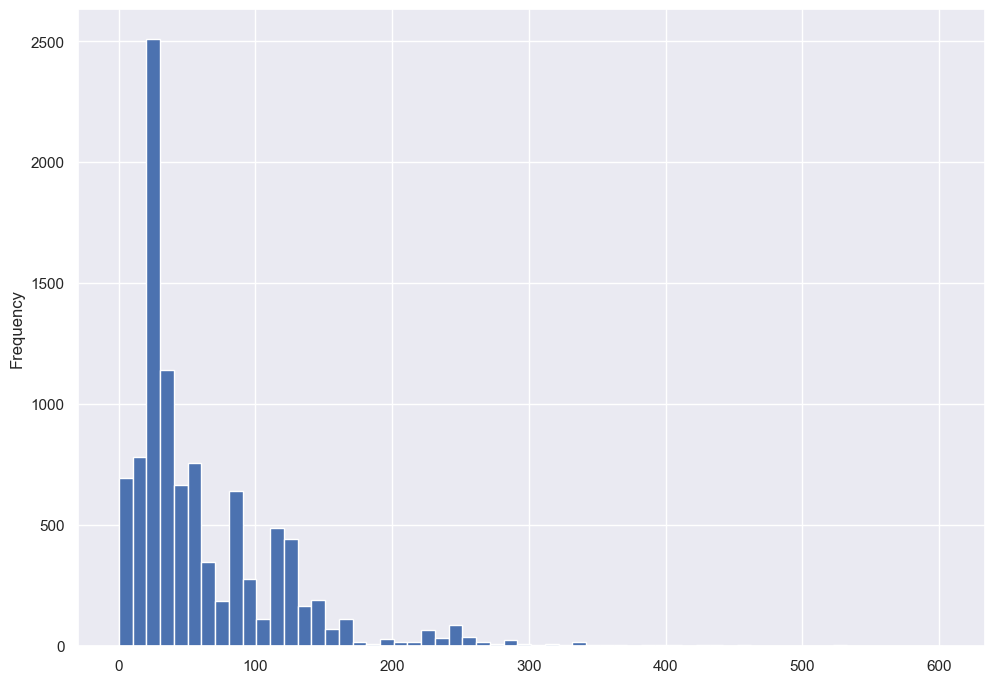

In [106]:
g_dist.sample(10000).plot(kind='hist', bins=60)

<AxesSubplot:ylabel='Frequency'>

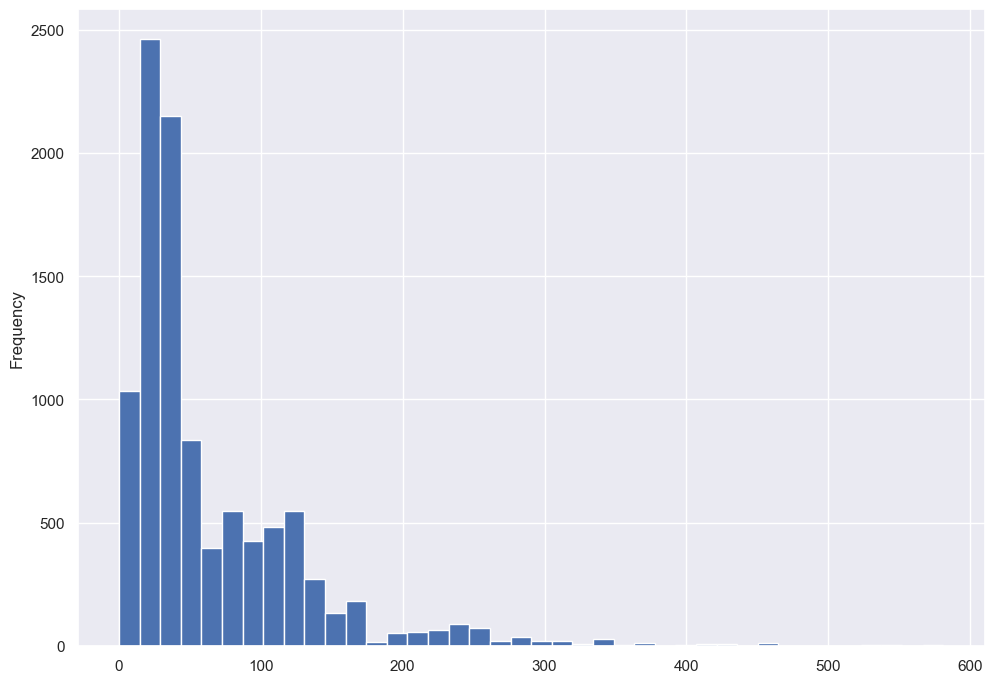

In [105]:
grm_dist.sample(10000).plot(kind='hist', bins=40)

In [99]:
grm_dist = branded_food[branded_food.serving_size_unit == 'GRM']['serving_size']
grm_dist.mean()

64.82681080355462

KeyboardInterrupt: 

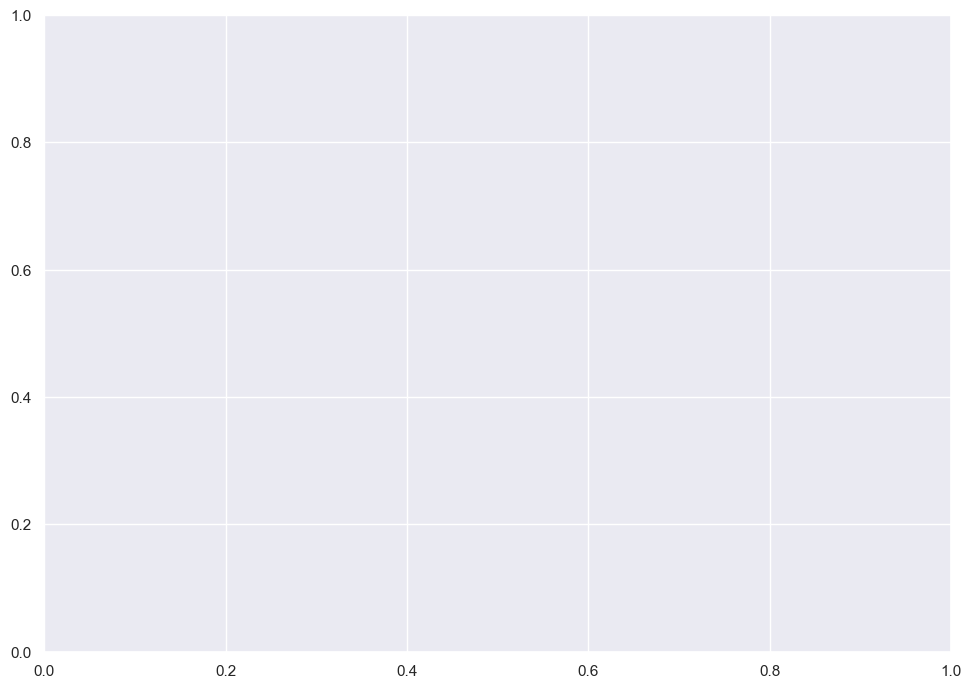

In [95]:
permutation_test = branded_food[branded_food.serving_size_unit.isin(['GRM', 'g'])]
sns.histplot(permutation_test, x='serving_size', hue='serving_size_unit')

In [91]:
branded_food.serving_size_unit.value_counts()

g      1522350
ml      243399
GRM      40597
MLT       8288
MG        7555
IU        3671
GM         346
MC          63
Name: serving_size_unit, dtype: int64

In [82]:
branded_food.columns

Index(['fdc_id', 'brand_owner', 'brand_name', 'subbrand_name', 'gtin_upc',
       'ingredients', 'not_a_significant_source_of', 'serving_size',
       'serving_size_unit', 'household_serving_fulltext',
       'branded_food_category', 'data_source', 'package_weight',
       'modified_date', 'available_date', 'market_country',
       'discontinued_date', 'preparation_state_code', 'trade_channel',
       'short_description'],
      dtype='object')

In [66]:
branded_food.modified_date = pd.to_datetime(branded_food.modified_date)
branded_food.available_date = pd.to_datetime(branded_food.available_date)

In [67]:
branded_food.isnull().sum()

fdc_id                               0
brand_owner                      14418
brand_name                      547614
subbrand_name                  1758248
gtin_upc                             0
ingredients                       5393
not_a_significant_source_of    1771801
serving_size                     10780
serving_size_unit                19028
household_serving_fulltext     1079658
branded_food_category            10572
data_source                          0
package_weight                 1139264
modified_date                       20
available_date                       0
market_country                       0
discontinued_date              1845297
preparation_state_code         1806146
trade_channel                  1829718
short_description              1806030
dtype: int64

We see that there are many columns with relatively any entries (discontinued date, preparation_state_code, trade_channel, short_description), which we will drop for a lower column count and less space in memory. While brand owner and (sub)brand name have some missing values, we will keep them as they may be helpful in identifying some foods later on.

In [9]:
# After looking at the dataset for a while, I realized that there are 
# multiple entries of the same food that is updated by available date, so we will use the most recent only.
branded_food[branded_food.gtin_upc == '00014100045526']

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
44289,355873,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,55 Pieces (30g),NaN,GDSN,NaN,2018-12-22,2019-04-01,United States,NaN,NaN,NaN,NaN
294988,612900,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,Per Serving,Biscuits/Cookies,GDSN,NaN,2019-11-23,2019-12-06,United States,NaN,NaN,NaN,NaN
370252,771890,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,Per Serving,Biscuits/Cookies,GDSN,NaN,2019-11-23,2020-02-27,United States,NaN,NaN,NaN,NaN
373893,792125,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,Per Serving,Biscuits/Cookies,GDSN,NaN,2020-02-29,2020-04-01,United States,NaN,NaN,NaN,NaN
382350,809336,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,Per Serving,Biscuits/Cookies,GDSN,NaN,2020-03-07,2020-05-01,United States,NaN,NaN,NaN,NaN
383074,810792,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,Per Serving,Biscuits/Cookies,GDSN,NaN,2020-04-25,2020-05-28,United States,NaN,NaN,NaN,NaN
456560,1848707,Pepperidge Farm Inc.,PEPPERIDGE FARM,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,75.0,g,NaN,Biscuits/Cookies,GDSN,2.65 ONZ,2021-06-26,2021-07-29,United States,NaN,NaN,NaN,NaN
498892,1054845,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,30.0,g,Per Serving,Biscuits/Cookies,GDSN,NaN,2020-06-27,2020-07-30,United States,NaN,NaN,NaN,NaN
555868,1146040,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,75.0,g,NaN,Biscuits/Cookies,GDSN,NaN,2020-10-17,2020-12-30,United States,NaN,NaN,NaN,NaN
564160,1155171,PEPPERIDGE FARM,NaN,NaN,00014100045526,MADE WITH SMILES AND ENRICHED WHEAT FLOUR (FLO...,NaN,75.0,g,NaN,Biscuits/Cookies,GDSN,NaN,2020-12-26,2021-01-28,United States,NaN,NaN,NaN,NaN


One thing I would like to look at is the available date of all the foods to see if the amount of foods introduced have increased or decreased in an exponential matter as time goes on. One thing we must keep in mind is that these foods are only from 2019 and beyond.

<AxesSubplot:>

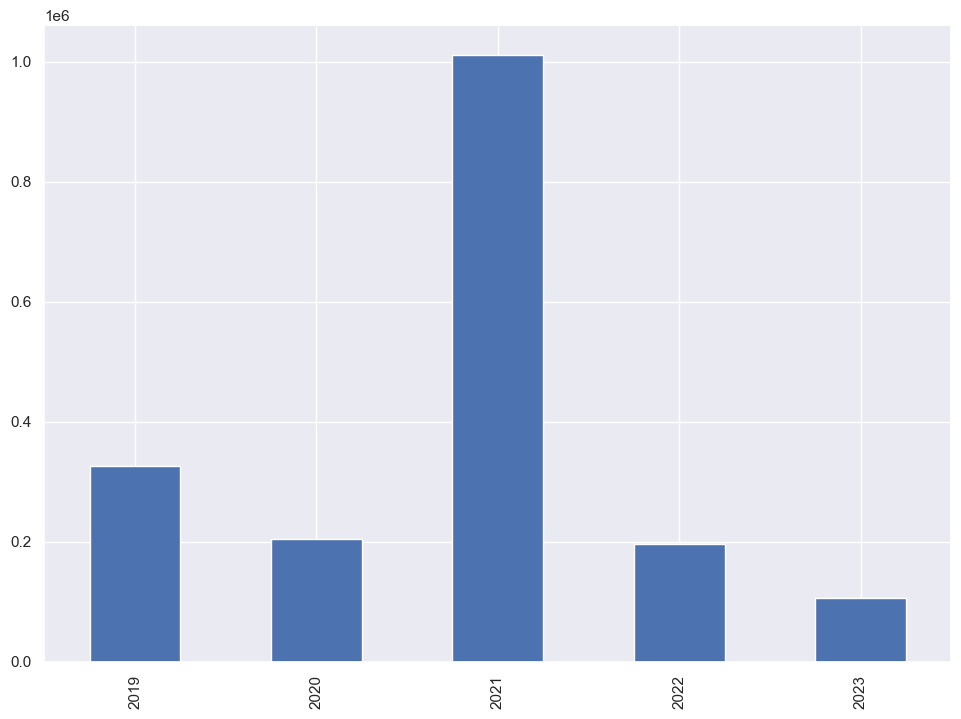

In [77]:
branded_food.available_date.dt.year.value_counts().sort_index().plot(kind='bar')

We see that there was a major increase in available foods in 2021, which is something that should be investigated after further data cleaning.

In [79]:
# Drop duplicate rows in favor for most recent product 
test = branded_food.sort_values(by=['gtin_upc','available_date'])
test = test.drop_duplicates('gtin_upc', keep='last')
test

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
493843,1043843,WEGMANS,NaN,NaN,0 - 77890 - 32930,"HUMMUS INGREDIENTS: CHICK PEAS, FILTERED WATER...",NaN,85.0,g,85 GRM,Crackers & Biscotti,LI,NaN,2020-05-22,2020-06-26,United States,NaN,NaN,NaN,NaN
496486,1049145,WEGMANS,NaN,NaN,0 - 77890 - 44656,"INGREDIENTS: PURIFIED WATER, ORGANIC LEMON JUI...",NaN,429.0,ml,14.5 OZA,"Fruit & Vegetable Juice, Nectars & Fruit Drinks",LI,NaN,2020-05-22,2020-06-26,United States,NaN,NaN,NaN,NaN
494910,1045979,WEGMANS ORGANIC,NaN,NaN,0 - 77890 - 47590,"INGREDIENTS: WATER, ORGANIC MUSHROOMS, ORGANIC...",NaN,425.0,g,1 can,Canned Soup,LI,NaN,2020-05-22,2020-06-26,United States,NaN,NaN,NaN,NaN
495318,1046795,WEGMANS,NaN,NaN,0 - 77890 - 48312,"BROWN RICE FLOUR, POTATO STARCH, SAFFLOWER OIL...",NaN,30.0,g,15 crackers,Crackers & Biscotti,LI,NaN,2020-05-22,2020-06-26,United States,NaN,NaN,NaN,NaN
495317,1046793,WEGMANS,NaN,NaN,0 - 77890 - 48313,"BROWN RICE FLOUR, POTATO STARCH, SAFFLOWER OIL...",NaN,30.0,g,14 crackers,Crackers & Biscotti,LI,NaN,2020-05-21,2020-06-26,United States,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504291,1065873,NOT A BRANDED ITEM,NaN,NaN,BOOST,"WATER, GLUCOSE SYRUP, SUGAR, MILK PROTEIN CONC...",NaN,237.0,ml,1 bottle,"Energy, Protein & Muscle Recovery Drinks",LI,NaN,2020-06-16,2020-07-30,United States,NaN,NaN,NaN,NaN
511875,1081623,NOT A BRANDED ITEM,NaN,NaN,HAPPYKID ORGANICS,"CULTURED GRADE A ORGANIC MILK, WATER, ORGANIC ...",NaN,99.0,g,1 pouch,Yogurt,LI,NaN,2020-07-24,2020-08-27,United States,NaN,NaN,NaN,NaN
503320,1063921,"TINE SA- OSLO, NORWAY",NaN,NaN,JARLSBERG,"INGREDIENTS: PASTEURIZED PART-SKIM MILK, CULTU...",NaN,28.0,g,1 ONZ,Cheese,LI,NaN,2020-06-16,2020-07-30,United States,NaN,NaN,NaN,NaN
227028,539755,7UP,NaN,NaN,NIELSENUK0002,"CARBONATED WATER, ACIDS (CITRIC ACID, MALIC AC...",NaN,100.0,ml,100 MLT,Soda,LI,NaN,2017-07-14,2019-04-01,United States,NaN,NaN,NaN,NaN


In [11]:

branded_food = branded_food.drop(columns=['discontinued_date', 'preparation_state_code', 'trade_channel', 'short_description'])
# fdc_id is also unique for the table
branded_food = branded_food.set_index('fdc_id')
branded_food

,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country
fdc_id,,,,,,,,,,,,,,,
1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States
1105905,CAMPBELL SOUP COMPANY,NaN,NaN,00051000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States
1105906,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States
1105907,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States
1105908,CAMPBELL SOUP COMPANY,NaN,NaN,00051000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554910,Mt. Garfield Winery Corp,LIFESTYLEFOODS,NaN,898425002682,ARCADIAN HARVEST LETTUCE (BLEND OF LEAF LETTUC...,NaN,163.0,GRM,NaN,"Pickles, Olives, Peppers & Relishes",LI,5.75 oz./163 g,2023-03-10,2023-05-25,United States
2554911,All Market Inc.,VITA COCO,NaN,898999012858,"COCONUT WATER FROM CONCENTRATE (WATER, COCONUT...",NaN,240.0,MLT,8 fl oz,Plant Based Water,LI,500 mL/16.9 fl oz,2023-04-20,2023-05-25,United States
2554912,Chaneys Dairy Barn,CHANEY'S,NaN,899503001443,"WHOLE MILK, VITAMIN D3",NaN,240.0,MLT,1 cup,Milk,LI,0.5 g/1.89 L,2023-04-20,2023-05-25,United States


In [12]:
# This dataset only contains entries for either united states or zealand.
branded_food['for_united_states'] = (branded_food.market_country == 'United States').astype(np.int8)

In [13]:
branded_food.market_country.value_counts(dropna=False)

United States    1844180
New Zealand         1117
Name: market_country, dtype: int64

In [14]:
branded_food[branded_food.not_a_significant_source_of.notna()].not_a_significant_source_of.head().values

array(['Not a significant source of dietary fiber, vitamin D, calcium, iron and potassium.',
       'NOT A SIGNIFICANT SOURCE OF DIETARY FIBER, SUGARS, VITAMIN A, VITAMIN C, CALCIUM, AND IRON.',
       'NOT A SIGNIFICANT SOURCE OF DIETARY FIBER, SUGARS, VITAMIN A , VITAMIN C, CALCIUM AND IRON.',
       'NOT A SIGNIFICANT SOURCE OF SATURATED FAT, TRANS FAT, CHOLESTEROL, DIETARY FIBER, TOTAL SUGARS, ADDED SUGARS, VITAMIN D, CALCIUM, IRON AND POTASSIUM.',
       'NOT A SIGNIFICANT SOURCE OF TRANS FAT, CHOLESTEROL, ADDED SUGARS, VITAMIN D, CALCIUM AND IRON.'],
      dtype=object)

In [15]:
# Get process insignificant sources (a lot more processing for a more standard convention)
insignificant_processed = (
    branded_food.not_a_significant_source_of
    .str.lower()
    # Cut off repetition (not a significant source)
    .str.replace(r'.*not( a)? significant source of:? ?', '', regex=True)
    # Fix comma spacing
    .str.replace(',? ?and,?', ',', regex=True)
    .str.replace('\s*,\s*', ',', regex=True)
    # Remove any periods
    .str.replace('.', '', regex=False)
    # Fix spelling errors/inconsistency
    .str.replace(r'form', 'from')
    .str.replace('potass?(ium)?', 'potassium', regex=True)
    .str.replace('cholest(erol)?', 'cholesterol', regex=True)
    .str.replace(r'sat(urated)?\s*fat', 'satured fat', regex=True)
    .str.replace(r'trans ?fat', 'trans fat', regex=True)
    .str.replace(r'dietary ?fiber', 'dietary fiber', regex=True)
    .str.replace(r'added ?sugars', 'dietary fiber', regex=True)
    .str.replace(r'\W+or\W+', ',', regex=True)
    .str.replace(r'total ?sugars', 'total sugars', regex=True)
    # Fix vitamin entries (sometimes have only the letter, abbreviated forms, missing spaces, etc)
    .str.replace(r'vit(amin)?\s?(\w)', r'vitamin \2', regex=True)
).str.split(',')

With our better standardization (although some errors still existing), we can attempt to save more space by simply recording if they have one of the most common insignificant sources (common being more than 1000 entries).

In [16]:
# Get more common insignificant sources
insignificant_sources_freq = insignificant_processed.explode().value_counts().head(20)
insignificant_sources_freq

dietary fiber        64766
iron                 56796
calcium              55536
cholesterol          50578
trans fat            49151
satured fat          43524
vitamin d            41715
potassium            31519
vitamin a            19436
vitamin c            17629
total sugars         10602
calories from fat     8254
sugars                6162
fiber                 4684
other nutrients       1829
protein                867
fat cal                828
sugar                  505
c                      350
                       263
Name: not_a_significant_source_of, dtype: int64

In [17]:
insignificant_sources = insignificant_sources_freq[insignificant_sources_freq > 1000].index
insignificant_sources

Index(['dietary fiber', 'iron', 'calcium', 'cholesterol', 'trans fat',
       'satured fat', 'vitamin d', 'potassium', 'vitamin a', 'vitamin c',
       'total sugars', 'calories from fat', 'sugars', 'fiber',
       'other nutrients'],
      dtype='object')

In [18]:
insignificant_processed[insignificant_processed.str.contains(insignificant_sources[0], regex=False).fillna(False)]

fdc_id
1849687    [dietary fiber, vitamin d, calcium, iron, pota...
1849735    [dietary fiber, sugars, vitamin a, vitamin c, ...
1849762    [dietary fiber, sugars, vitamin a, vitamin c, ...
1849763    [satured fat, trans fat, cholesterol, dietary ...
1849769    [trans fat, cholesterol, dietary fiber, vitami...
                                 ...                        
2554859                           [vitamin d, dietary fiber]
2554889    [satured fat, trans fat, cholesterol, dietary ...
2554893    [satured fat, trans fat, cholesterol, dietary ...
2554894    [satured fat, trans fat, cholesterol, dietary ...
2554895    [satured fat, trans fat, cholesterol, dietary ...
Name: not_a_significant_source_of, Length: 53631, dtype: object

In [19]:
# Populate dictionary for inserting into dataset
new_source_columns = dict()
for source in insignificant_sources:
    # Create series telling whether the food lists nutrient or not
    source_series = insignificant_processed.str.contains(source, regex=False).fillna(False).astype(np.int8)
    new_source_columns[source] = source_series
    
new_source_columns['dietary fiber']

fdc_id
1105904    0
1105905    0
1105906    0
1105907    0
1105908    0
          ..
2554910    0
2554911    0
2554912    0
2554913    0
2554914    0
Name: not_a_significant_source_of, Length: 1845297, dtype: int8

In [20]:
for source, series in new_source_columns.items():
    # Format source name to be underlined and not spaced
    source = 'insig_' + source.replace(' ', '_')
    # Populate dataset
    branded_food[source] = series

In [21]:
import sys
sys.getsizeof('h')

50

In [22]:
len(new_source_columns) * 1845297

27679455

In [23]:
# Get size of each string in insignificant sources
insig_size = branded_food[branded_food.not_a_significant_source_of.notnull()].not_a_significant_source_of.apply(lambda x: sys.getsizeof(x)).sum()
pointer_size = branded_food.not_a_significant_source_of.memory_usage()
insig_size + pointer_size

40708496

In [24]:
# Drop the insignificant sources column as we are now done with it
branded_food = branded_food.drop(columns=['not_a_significant_source_of'])
branded_food.head()

,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,...,insig_satured_fat,insig_vitamin_d,insig_potassium,insig_vitamin_a,insig_vitamin_c,insig_total_sugars,insig_calories_from_fat,insig_sugars,insig_fiber,insig_other_nutrients
fdc_id,,,,,,,,,,,,,,,,,,,,,
1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,15.0,ml,NaN,Oils Edible,GDSN,...,0,0,0,0,0,0,0,0,0,0
1105905,CAMPBELL SOUP COMPANY,NaN,NaN,00051000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,...,0,0,0,0,0,0,0,0,0,0
1105906,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",440.0,g,NaN,Prepared Soups,GDSN,...,0,0,0,0,0,0,0,0,0,0
1105907,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",440.0,g,NaN,Prepared Soups,GDSN,...,0,0,0,0,0,0,0,0,0,0
1105908,CAMPBELL SOUP COMPANY,NaN,NaN,00051000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,...,0,0,0,0,0,0,0,0,0,0


# Branded food category
We will drop foods that have less than 100 foods in their respective category, as these wouldn't have many other branded foods to compare to, and some of these categories are incorrect or incredibly specific (specific use case, usually for creating other branded foods or are for restaurant use).

In [25]:
remove_categories = branded_food.branded_food_category.value_counts() < 100
to_remove = remove_categories[remove_categories].index
remove_ind = branded_food.branded_food_category.isin(to_remove)
remove_ind = remove_ind[remove_ind].index
branded_food.drop(index=remove_ind)
print(remove_ind.shape[0], 'rows removed') 

3487 rows removed


## Most common branded food categories

We may want to look at this to see categories where there is the most amount of foods and where there might not be as many.

<AxesSubplot:>

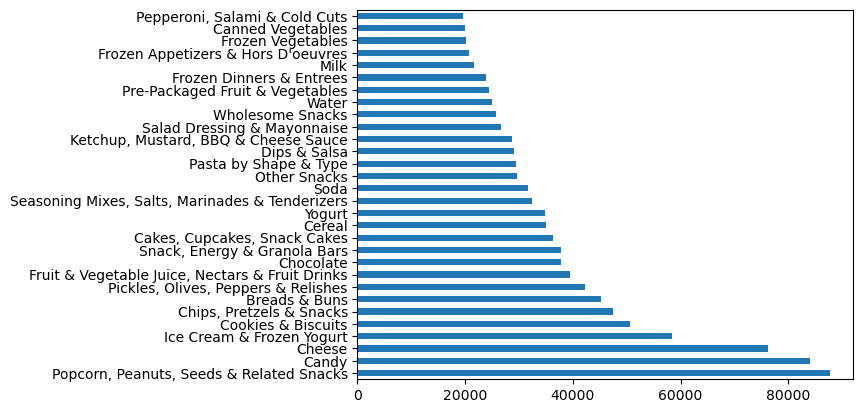

In [26]:
branded_food.branded_food_category.value_counts().head(30).plot(kind='barh')

We see that many sugary or snack-based foods tend to have the most branded foods. This makes sense, as many US-based products are sugary, and usually attempt to differentiate themselves with different low-costing foods for a customer to try once. However, we also see other categories, like seasonings, pasta, water, and frozen dinners.

from these categories, we can possibly see the distribution of certain nutrients that they carry, and possibly see what categories carry the same distribution of nutrients.

In [27]:
nutrient_table = pd.read_csv('nutrient.csv')
nutrient_table

,id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957.0,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958.0,290.0
2,1001,Solids,G,201.0,200.0
3,1002,Nitrogen,G,202.0,500.0
4,1003,Protein,G,203.0,600.0
...,...,...,...,...,...
469,2061,"Ergosta-7,22-dienol",MG,NaN,16211.0
470,2062,"Ergosta-5,7-dienol",MG,NaN,16211.0
471,2063,Verbascose,G,NaN,2450.0
472,2064,Oligosaccharides,MG,NaN,2250.0


In [28]:
def get_nutrient_list(fdc_id):
    # Fetch food from the branded_food dataframe
    food = branded_food[branded_food.fdc_id == fdc_id]
    assert len(food) == 1, "Food not found"
    
    # Join food with nutrient list
    food_nutrients = nutrient[nutrient.fdc_id == example_id]
    full_query = food_nutrients.merge(nutrient_table, left_on='nutrient_id', right_on='id')[['nutrient_id', 'name', 'amount', 'unit_name']]
    full_query.sort_values(['unit_name', 'amount'], ascending=False)
    return food

In [29]:
example_id = 1105904
food = branded_food.loc[example_id]
# Get meta data about food
food_nutrients = food_nutrient[food_nutrient.fdc_id == example_id]
full_query = food_nutrients.merge(nutrient_table, left_on='nutrient_id', right_on='id')[['nutrient_id', 'name', 'amount', 'unit_name']]
full_query.sort_values(['unit_name', 'amount'], ascending=False)

,nutrient_id,name,amount,unit_name
7,1093,"Sodium, Na",0.00,MG
9,1087,"Calcium, Ca",0.00,MG
11,1162,"Vitamin C, total ascorbic acid",0.00,MG
12,1089,"Iron, Fe",0.00,MG
14,1092,"Potassium, K",0.00,MG
15,1253,Cholesterol,0.00,MG
13,1008,Energy,867.00,KCAL
3,1110,"Vitamin D (D2 + D3), International Units",0.00,IU
6,1104,"Vitamin A, IU",0.00,IU
1,1004,Total lipid (fat),93.33,G


In [30]:
food_nutrient[food_nutrient.amount > 0.05].nutrient_id.value_counts()[:50]

1008    1642589
1005    1562898
1093    1483946
2000    1333341
1003    1309785
1004    1215672
1087    1020231
1089    1005026
1258     971223
1079     937591
1092     673779
1253     622182
1104     359760
1235     349921
1162     335966
1292     169981
1293     167757
1167     119869
1166     103435
1175      71584
1091      70762
1110      70074
1090      69739
1165      58588
1095      57457
1178      54580
1177      51525
1186      36881
1170      32936
1257      32592
1098      31168
1103      25299
1185      21405
1051      19500
1101      18648
1086      15480
1007      13643
1084      12994
1190      12746
1082      12601
1109      11990
1265      11644
1187      11162
1180      11039
1269      10672
1268      10465
1266      10367
1106       8984
1100       8298
1062       7926
Name: nutrient_id, dtype: int64

In [31]:
nutrients_reduced = food_nutrient.drop(columns=['data_points', 'derivation_id', 'min', 'max'])
nutrients_reduced

,fdc_id,nutrient_id,amount
id,,,
13706913,1105904,1003,0.00
13706914,1105904,1004,93.33
13706915,1105904,1005,0.00
13706924,1105904,1110,0.00
13706918,1105904,1079,0.00
...,...,...,...
31781973,2554914,1110,0.00
31781965,2554914,1005,13.33
31781974,2554914,1253,0.00


In [32]:
nutrient_table.set_index('id').loc[[1003, 1005, 1093, 1004, 1008, 2000, 1258]]

,name,unit_name,nutrient_nbr,rank
id,,,,
1003,Protein,G,203.0,600.0
1005,"Carbohydrate, by difference",G,205.0,1110.0
1093,"Sodium, Na",MG,307.0,5800.0
1004,Total lipid (fat),G,204.0,800.0
1008,Energy,KCAL,208.0,300.0
2000,"Sugars, total including NLEA",G,269.0,1510.0
1258,"Fatty acids, total saturated",G,606.0,9700.0


In [33]:
brand_category = branded_food[['branded_food_category']]
brand_category

,branded_food_category
fdc_id,
1105904,Oils Edible
1105905,Herbs/Spices/Extracts
1105906,Prepared Soups
1105907,Prepared Soups
1105908,Herbs/Spices/Extracts
...,...
2554910,"Pickles, Olives, Peppers & Relishes"
2554911,Plant Based Water
2554912,Milk


In [34]:
big_table = brand_category.merge(nutrients_reduced, how='left', left_index=True, right_on='fdc_id')
big_table

,branded_food_category,fdc_id,nutrient_id,amount
13706913.0,Oils Edible,1105904,1003.0,0.00
13706914.0,Oils Edible,1105904,1004.0,93.33
13706915.0,Oils Edible,1105904,1005.0,0.00
13706924.0,Oils Edible,1105904,1110.0,0.00
13706918.0,Oils Edible,1105904,1079.0,0.00
...,...,...,...,...
31781973.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1110.0,0.00
31781965.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1005.0,13.33
31781974.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1253.0,0.00
31781963.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1003.0,23.33


In [35]:
nutrient_table[nutrient_table.name == 'Energy']

,id,name,unit_name,nutrient_nbr,rank
9,1008,Energy,KCAL,208.0,300.0
63,1062,Energy,kJ,268.0,400.0


In [36]:
category_stats = (
    big_table
    .groupby(['branded_food_category', 'nutrient_id'])['amount'].describe() # Gets statistics by group and nutrient
    .reset_index().merge(nutrient_table.drop(columns=['nutrient_nbr', 'rank']),
                         how='left', left_on='nutrient_id', right_on='id') # combines with nutrient name
    #.set_index(['branded_food_category','name'])
)
category_stats

,branded_food_category,nutrient_id,count,mean,std,min,25%,50%,75%,max,id,name,unit_name
0,Alcohol,1003.0,3194.0,1.261340,32.665458,0.00,0.000,0.00,0.00,1833.33,1003,Protein,G
1,Alcohol,1004.0,3106.0,1.437048,43.601502,0.00,0.000,0.00,0.00,2416.67,1004,Total lipid (fat),G
2,Alcohol,1005.0,3217.0,37.723034,118.855281,0.00,5.830,17.67,35.83,1933.33,1005,"Carbohydrate, by difference",G
3,Alcohol,1008.0,3244.0,165.681258,701.643377,0.00,29.000,75.00,144.00,30833.00,1008,Energy,KCAL
4,Alcohol,1079.0,1889.0,0.799259,4.706937,0.00,0.000,0.00,0.80,100.00,1079,"Fiber, total dietary",G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,Yogurt/Yogurt Substitutes (Perishable),1162.0,7.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00,1162,"Vitamin C, total ascorbic acid",MG
10333,Yogurt/Yogurt Substitutes (Perishable),1253.0,7.0,6.571429,1.812654,4.00,6.000,6.00,7.50,9.00,1253,Cholesterol,MG
10334,Yogurt/Yogurt Substitutes (Perishable),1257.0,7.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.00,1257,"Fatty acids, total trans",G
10335,Yogurt/Yogurt Substitutes (Perishable),1258.0,7.0,0.780000,0.379693,0.44,0.590,0.59,0.96,1.33,1258,"Fatty acids, total saturated",G


In [37]:
category_stats['name'].value_counts().head(30)

Energy                                      438
Protein                                     426
Sodium, Na                                  424
Total lipid (fat)                           424
Sugars, total including NLEA                424
Carbohydrate, by difference                 424
Fatty acids, total saturated                420
Fiber, total dietary                        380
Fatty acids, total trans                    359
Calcium, Ca                                 338
Cholesterol                                 338
Iron, Fe                                    334
Potassium, K                                310
Vitamin C, total ascorbic acid              285
Vitamin A, IU                               274
Vitamin D (D2 + D3), International Units    268
Sugars, added                               265
Fatty acids, total monounsaturated          229
Fatty acids, total polyunsaturated          228
Riboflavin                                  180
Niacin                                  

In [38]:
category_stats.pivot_table(index='branded_food_category', columns='name', values='mean')

name,Acetic acid,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucans,Biotin,Caffeine,"Calcium, Ca",...,"Vitamin D (D2 + D3), International Units",Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E,Vitamin E (alpha-tocopherol),Vitamin E (label entry primarily),Vitamin K (phylloquinone),Water,Xylitol,"Zinc, Zn"
branded_food_category,,,,,,,,,,,,,,,,,,,,,
Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2146.5,NaN,38.761788,...,0.404918,NaN,NaN,56.000000,0.000000,NaN,NaN,NaN,NaN,2.373333
Alcoholic Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All Noodles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,23.521004,...,22.326644,NaN,NaN,3.000000,NaN,NaN,16.000000,NaN,NaN,3.171667
Amino Acid Supplements,NaN,NaN,NaN,25.455,NaN,NaN,NaN,NaN,NaN,727.000000,...,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,34.550000
Antioxidant Supplements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.166667,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wrapped Snacks - Nut Bars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,125.092203,...,7037.808955,NaN,0.0,1.986667,1.433962,NaN,5.590909,NaN,NaN,1.162321
Yogurt (Perishable),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.870370,...,54.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
def category_hist(nutrient, statistic):
    # Returns the bar plot of the given nutrient and statistic, up to 30 at a time.
    entries = category_stats[category_stats.name == nutrient]
    
    entries = entries[entries[statistic] > 0.01]
    entries = entries.sort_values(statistic, ascending=False).head(30)
    return entries.plot(kind='barh', 
                        x='branded_food_category', 
                        y=statistic, 
                        xlabel='Category', 
                        title= f"{statistic.title()} {nutrient.title()} ({entries['unit_name'].iloc[0]}) for each Category"
                       )

In [40]:
test = category_stats[category_stats.name == 'Energy']
test = test[test.branded_food_category == 'Chocolate']
test

,branded_food_category,nutrient_id,count,mean,std,min,25%,50%,75%,max,id,name,unit_name
2127,Chocolate,1008.0,35662.0,515.17921,240.729072,0.0,474.0,514.0,553.0,17000.0,1008,Energy,KCAL
2129,Chocolate,1062.0,1.0,2399.00000,NaN,2399.0,2399.0,2399.0,2399.0,2399.0,1062,Energy,kJ


<AxesSubplot:title={'center':'Mean Energy (kJ) for each Category'}, ylabel='Category'>

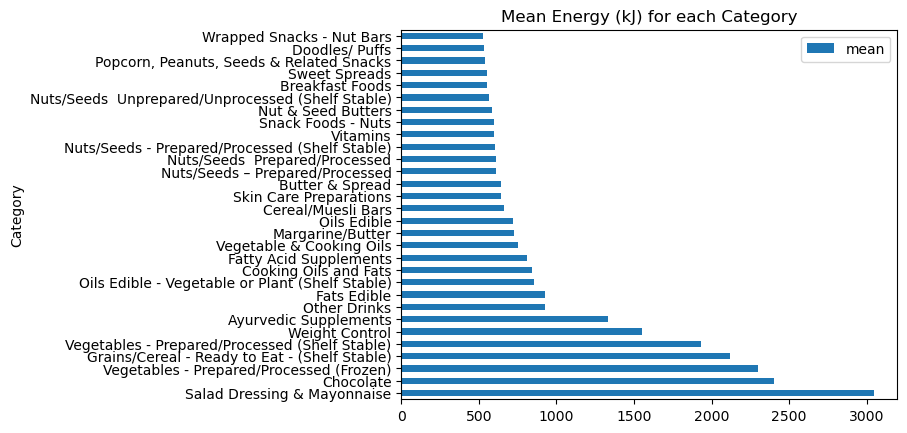

In [41]:
category_hist('Energy', 'mean')

<AxesSubplot:title={'center':'50% Energy (kJ) for each Category'}, ylabel='Category'>

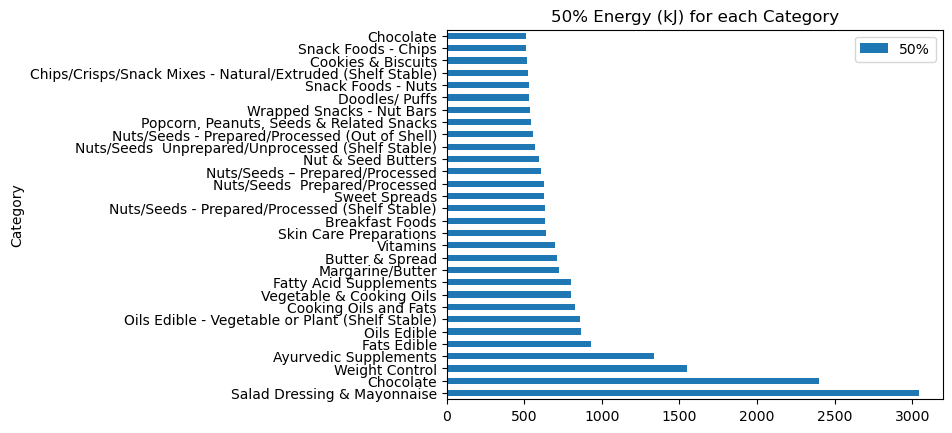

In [42]:
category_hist('Energy', '50%')

<AxesSubplot:title={'center':'50% Protein (G) for each Category'}, ylabel='Category'>

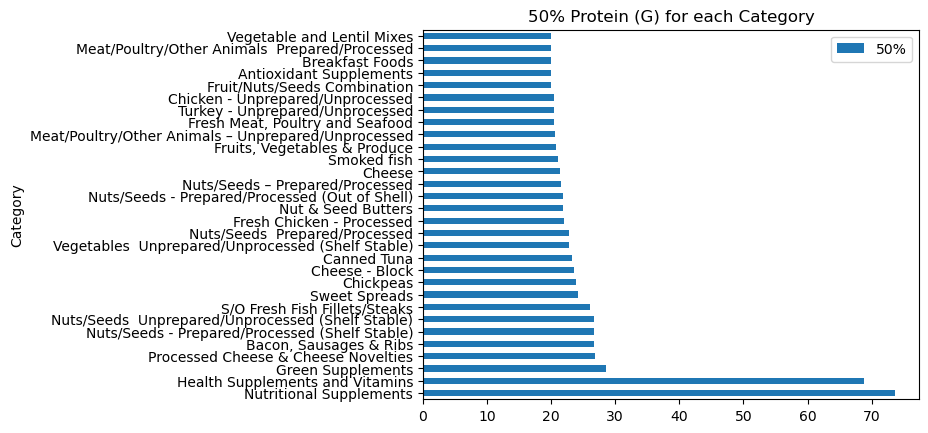

In [43]:
category_hist('Protein', '50%')

In [44]:
def category_ranking(category, metric='mean', ascending=False):
    results = category_stats[category_stats.name == category]
    return results.sort_values(metric,
                               ascending=ascending).head(25).plot(kind='barh',
                                                                  x='branded_food_category',
                                                                  y='mean',
                                                                 title=f"{category} ranking by Food Category",
                                                                 xlabel='Category')

<AxesSubplot:title={'center':'Energy ranking by Food Category'}, ylabel='Category'>

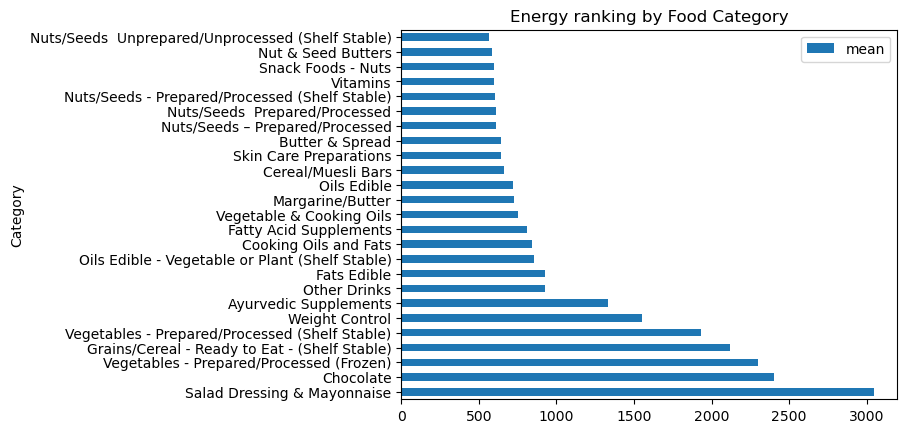

In [45]:
category_ranking('Energy', 'mean', ascending=False)

In [46]:
big_table[big_table['amount'] > 1]

,branded_food_category,fdc_id,nutrient_id,amount
13706914.0,Oils Edible,1105904,1004.0,93.33
13706929.0,Oils Edible,1105904,1292.0,20.00
13706928.0,Oils Edible,1105904,1258.0,13.33
13706916.0,Oils Edible,1105904,1008.0,867.00
13706930.0,Oils Edible,1105904,1293.0,53.33
...,...,...,...,...
31781964.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1004.0,56.67
31781968.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1079.0,10.00
31781965.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1005.0,13.33
31781963.0,"Popcorn, Peanuts, Seeds & Related Snacks",2554914,1003.0,23.33


<AxesSubplot:ylabel='Frequency'>

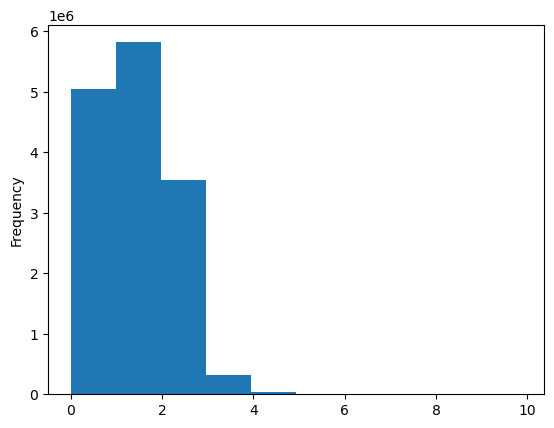

In [47]:
# We'll try to select a cut off for amounts (seems to be about 1e3)
big_table[big_table['amount'] > 1]['amount'].apply(np.log10).plot(kind='hist')

In [48]:
branded_food.loc[1106128]

brand_owner                                 The Endangered Species Chocolate Co
brand_name                                                                  NaN
subbrand_name                                                               NaN
gtin_upc                                                           037014000269
ingredients                   DARK CHOCOLATE (*CHOCOLATE LIQUOR,M CANE SUGAR...
serving_size                                                               43.0
serving_size_unit                                                             g
household_serving_fulltext                                                  NaN
branded_food_category                                                 Chocolate
data_source                                                                  LI
package_weight                                                              NaN
modified_date                                               2020-04-15 00:00:00
available_date                          

In [49]:
nutrient_dict = {nutrient_id:nutrient_name for nutrient_id, nutrient_name in zip(nutrient_table.id, nutrient_table.name)}
nutrient_dict

{2047: 'Energy (Atwater General Factors)',
 2048: 'Energy (Atwater Specific Factors)',
 1001: 'Solids',
 1002: 'Nitrogen',
 1003: 'Protein',
 1004: 'Total lipid (fat)',
 1005: 'Carbohydrate, by difference',
 1006: 'Fiber, crude (DO NOT USE - Archived)',
 1007: 'Ash',
 1008: 'Energy',
 1009: 'Starch',
 1010: 'Sucrose',
 1011: 'Glucose',
 1012: 'Fructose',
 1013: 'Lactose',
 1014: 'Maltose',
 1015: 'Amylose',
 1016: 'Amylopectin',
 1017: 'Pectin',
 1018: 'Alcohol, ethyl',
 1019: 'Pentosan',
 1020: 'Pentoses',
 1021: 'Hemicellulose',
 1022: 'Cellulose',
 1023: 'pH',
 1024: 'Specific Gravity',
 1025: 'Organic acids',
 1026: 'Acetic acid',
 1027: 'Aconitic acid',
 1028: 'Benzoic acid',
 1029: 'Chelidonic acid',
 1030: 'Chlorogenic acid',
 1031: 'Cinnamic acid',
 1032: 'Citric acid',
 1033: 'Fumaric acid',
 1034: 'Galacturonic acid',
 1035: 'Gallic acid',
 1036: 'Glycolic acid',
 1037: 'Isocitric acid',
 1038: 'Lactic acid',
 1039: 'Malic acid',
 1040: 'Oxaloacetic acid',
 1041: 'Oxalic acid

In [60]:
def compare_dists(categories, nutrient):
    to_vis = big_table[big_table.branded_food_category.isin(categories)]
    to_vis = to_vis[to_vis.nutrient_id == nutrient]
    if len(categories) < to_vis.branded_food_category.nunique():
        print("Some categories may not contain", nutrient)
    to_vis = to_vis[to_vis.amount < 1e3] # Most entries do not have over 100 of the amount 
    return sns.kdeplot(data=to_vis, 
                       x='amount', 
                       hue='branded_food_category', 
                       fill=True,
                       #multiple="stack", 
                       #cumulative=True, 
                       common_norm=False)

<AxesSubplot:xlabel='amount', ylabel='Density'>

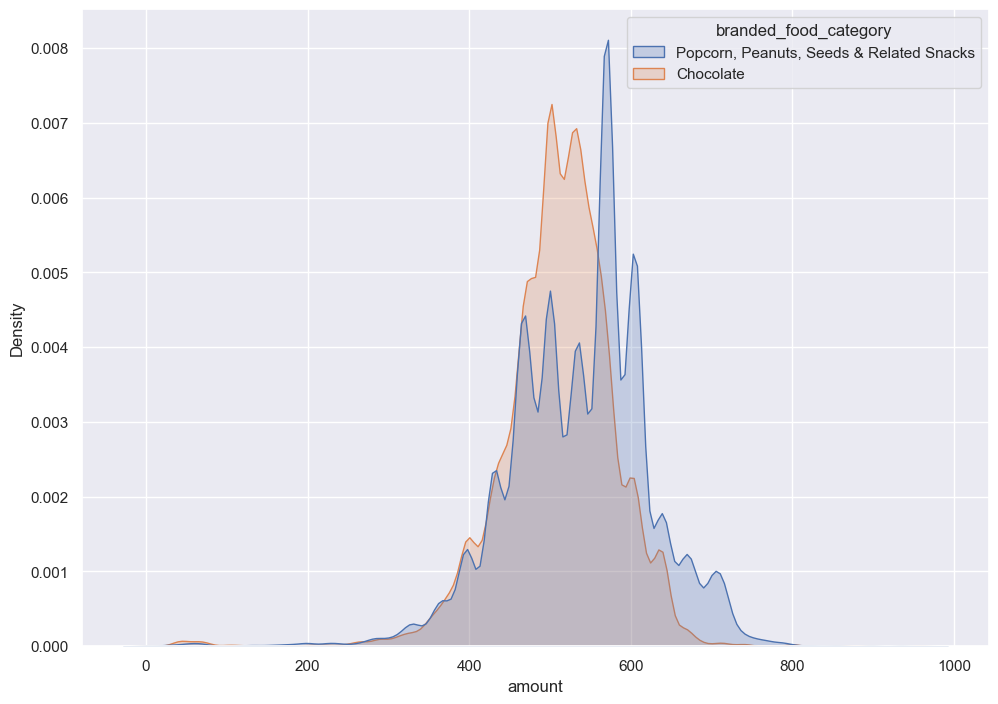

In [61]:
compare_dists(['Chocolate', 'Popcorn, Peanuts, Seeds & Related Snacks'], 1008)

<AxesSubplot:xlabel='amount', ylabel='Density'>

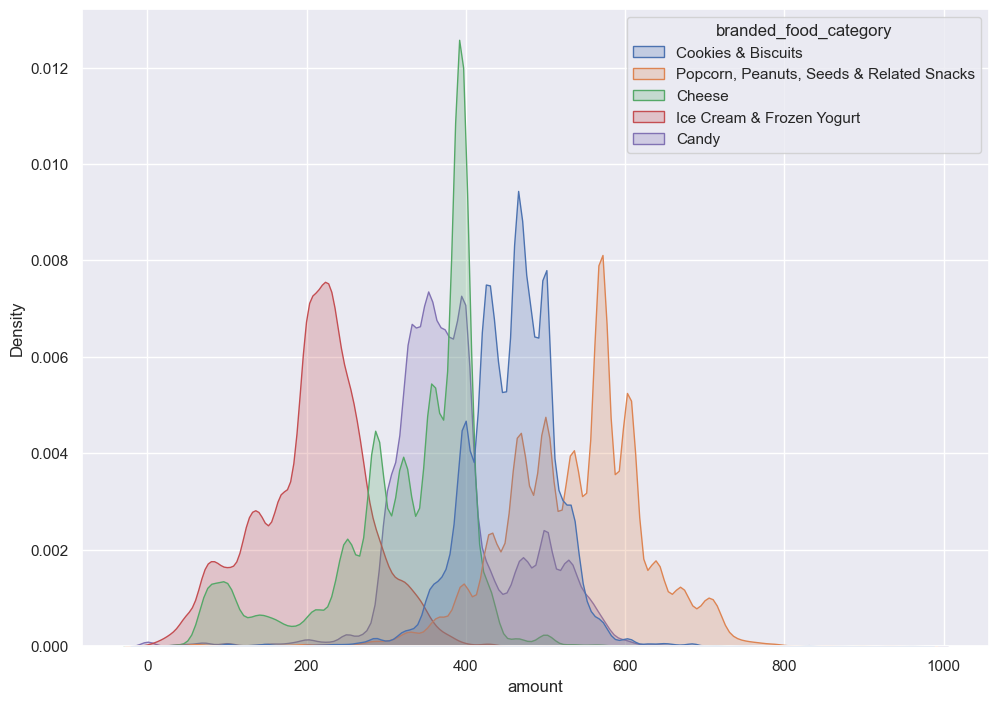

In [64]:
# Get top 20 and compare distributions for energy
top_20_categories = big_table[big_table.amount > 0].branded_food_category.value_counts().index[:5]
sns.set(rc={'figure.figsize':(11.7, 8.27)})
compare_dists(top_20_categories, 1008)

## Distribution of food brands per food category (easy)
